In [250]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
import dill as pickle
from rich import print

%matplotlib inline

In [232]:
perfile = "performance.csv"

df = pd.read_csv(perfile)
df.columns = [col.strip() for col in df.columns]

In [182]:
df

,,hidden_nodes,learning_rate,epochs,performance,training_time
0,0,10,0.01,1,0.8174,10.93
1,1,10,0.01,10,0.8853,112.03
2,2,10,0.01,15,0.8820,166.93
3,3,10,0.01,2,0.8737,22.14
4,4,10,0.01,20,0.9103,223.84
...,...,...,...,...,...,...
955,955,500,0.90,5,0.8571,334.95
956,956,500,0.90,6,0.8451,402.36
957,957,500,0.90,7,0.8127,456.80
958,958,500,0.90,8,0.8791,536.93


In [183]:
hidden_nodes = sorted(set(df['hidden_nodes'].to_numpy().astype('int')))
learning_rate = sorted(set(df['learning_rate'].to_numpy()))
epochs = sorted(set(df['epochs'].to_numpy().astype('int')))
print(f"{hidden_nodes = }")
print(f"{learning_rate = }")
print(f"{epochs = }")

hidden_nodes = [10, 20, 50, 100, 200, 300, 400, 500]

learning_rate = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

In [204]:
performance = df['performance'].to_numpy()
print(f"{performance.max() = }")

performance.max() = 0.9788

In [205]:
df.iloc[performance.argmax()].to_dict()

{
    '': 484.0,
    'hidden_nodes': 300.0,
    'learning_rate': 0.01,
    'epochs': 20.0,
    'performance': 0.9788,
    'training_time': 918.15
}

clf.lr = 0.01

clf.epochs = 20

clf.hnodes = 300

clf.performance = 0.9788

clf.training_time = 918.15

<Figure size 1152x576 with 1 Axes>

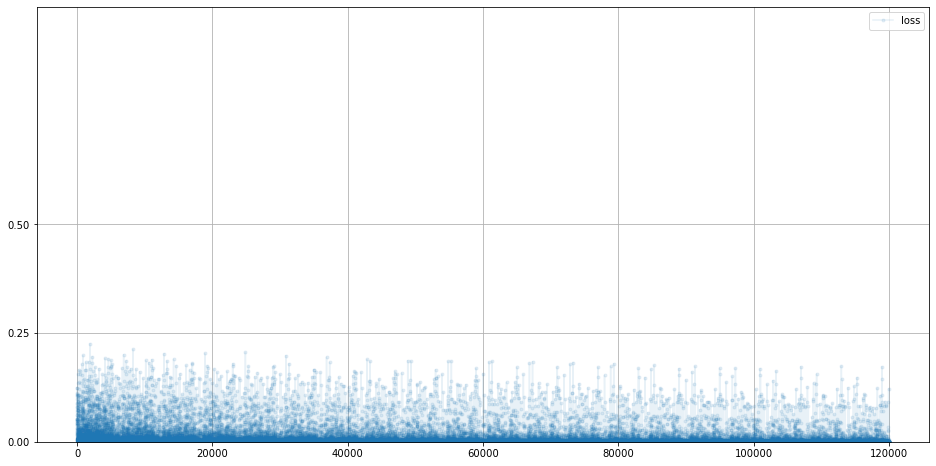

In [251]:
clf_dir = Path('./trained_classifiers')

# this one has max performance
clfname = clf_dir.joinpath('classifier_300_0.01_20.pkl')

with open(clfname, 'rb') as f:
    clf = pickle.load(f)
    
print(f"{clf.lr = }")
print(f"{clf.epochs = }")
print(f"{clf.hnodes = }")
print(f"{clf.performance = }")
print(f"{clf.training_time = :.2f}")

clf.plot_progress()

In [206]:
df.iloc[performance.argmin()].to_dict()

{
    '': 714.0,
    'hidden_nodes': 400.0,
    'learning_rate': 0.9,
    'epochs': 4.0,
    'performance': 0.804,
    'training_time': 224.86
}

In [207]:
training_time = df['training_time'].to_numpy()
print(f"Max training time: {training_time.max()/60:.2f} minutes.")

Max training time: 22.88 minutes.

In [208]:
df.iloc[training_time.argmax()].to_dict()

{
    '': 916.0,
    'hidden_nodes': 500.0,
    'learning_rate': 0.6,
    'epochs': 20.0,
    'performance': 0.911,
    'training_time': 1372.67
}

In [209]:
df.iloc[training_time.argmin()].to_dict()

{
    '': 84.0,
    'hidden_nodes': 10.0,
    'learning_rate': 0.7,
    'epochs': 1.0,
    'performance': 0.8437,
    'training_time': 10.53
}

In [191]:
plt_kwargs = {
    'figsize':  (10, 6), 
    'marker':  's', 
    'ms':  8, 
    'ls': '--',
    'fontsize': 14,
}

font = font_manager.FontProperties(size=14)

In [222]:
def select_data(df, sdict):
    all_keys = ['hidden_nodes', 'learning_rate', 'epochs']
    k0, k1 = sdict.keys()
    v0, v1 = sdict.values()
    subdf = df[(df[k0]==v0) & (df[k1]==v1)]
    sort_key = list(set(all_keys) - set(sdict.keys()))[0]
    subdf = subdf.sort_values(by=sort_key)
    return subdf, sort_key

In [225]:
def plot_perf(subdf, sdict, sort_key):
    ax = subdf.plot(x=sort_key, y='performance', **plt_kwargs)
    plt.gcf().tight_layout()
    ax.set_title(f"{sdict}", fontsize=20)
    ax.grid(axis='y')
    ax.set_xlabel(sort_key.title(), fontsize=15)
    ax.set_ylabel('Performance', fontsize=15)
    ax.legend(prop=font)
    ax.set_xticks(eval(sort_key))

<Figure size 720x432 with 1 Axes>

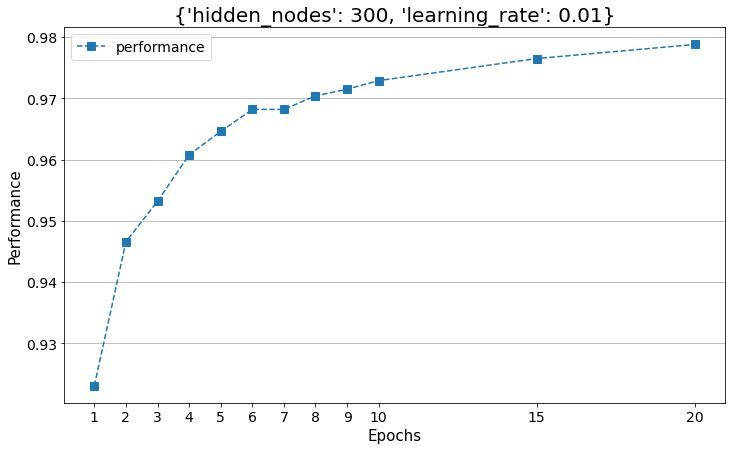

In [229]:
sdict = dict(hidden_nodes=300, learning_rate=0.01)
subdf, sort_key = select_data(df, sdict)
plot_perf(subdf, sdict, sort_key)

<Figure size 720x432 with 1 Axes>

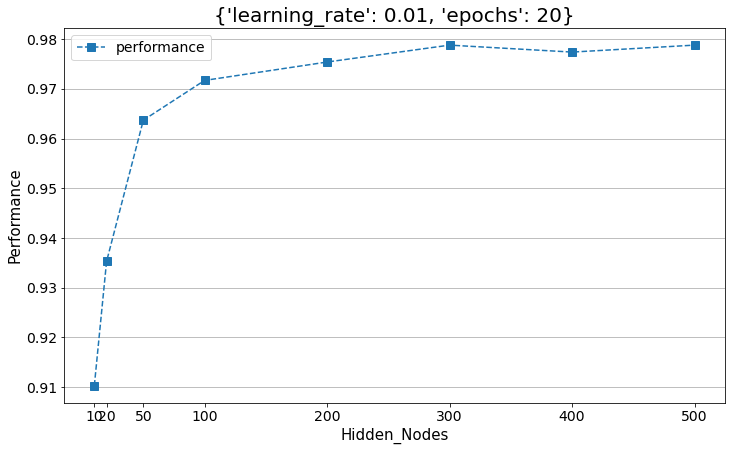

In [230]:
sdict = dict(learning_rate=0.01, epochs=20)
subdf, sort_key = select_data(df, sdict)
plot_perf(subdf, sdict, sort_key)

<Figure size 720x432 with 1 Axes>

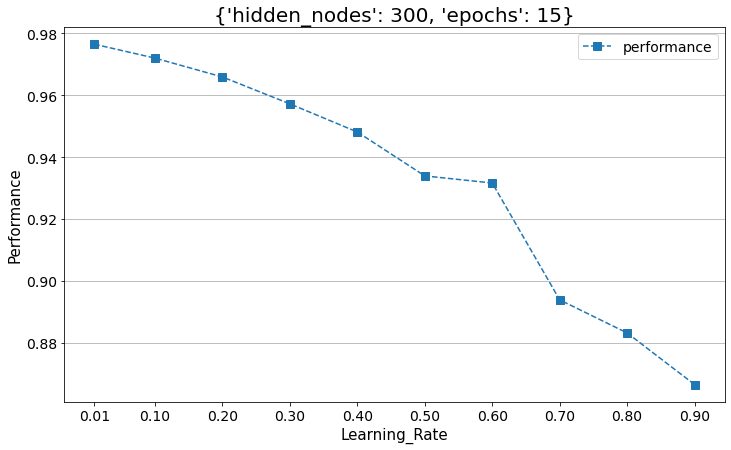

In [231]:
sdict = dict(hidden_nodes=300, epochs=15)
subdf, sort_key = select_data(df, sdict)
plot_perf(subdf, sdict, sort_key)

In [236]:
perfile_rot = "performance_rotation.csv"
df_rot = pd.read_csv(perfile_rot)
df_rot.columns = [col.strip() for col in df_rot.columns]

In [237]:
df_rot

,,angle,epochs,performance,training_time
0,0,10,10,0.9688,1048.58
1,1,10,13,0.9685,1361.35
2,2,10,15,0.9699,1597.51
3,3,10,5,0.9689,533.93
4,4,10,7,0.9671,733.22
5,5,12,10,0.9658,1222.62
6,6,12,13,0.9671,1485.07
7,7,12,15,0.9634,1807.47
8,8,12,5,0.9711,489.72
9,9,12,7,0.9669,927.76


In [243]:
angle = sorted(set(df_rot['angle'].to_numpy()))
epochs = sorted(set(df_rot['epochs'].to_numpy().astype('int')))
print(f"{angle = }")
print(f"{epochs = }")

angle = [3, 5, 7, 10, 12, 15, 20, 25]

epochs = [5, 7, 10, 13, 15]

In [246]:
performance = df_rot['performance'].to_numpy()
print(f"{performance = }")

performance = array([0.9688, 0.9685, 0.9699, 0.9689, 0.9671, 0.9658, 0.9671, 0.9634,
       0.9711, 0.9669, 0.9669, 0.9646, 0.9652, 0.9675, 0.969 , 0.964 ,
       0.9608, 0.9621, 0.9639, 0.9652, 0.956 , 0.9575, 0.9545, 0.9629,
       0.9633, 0.9666, 0.9651, 0.9655, 0.971 , 0.9671, 0.9658, 0.964 ,
       0.9696, 0.9676, 0.9707, 0.968 , 0.9684, 0.9665, 0.9683, 0.9686])

In [249]:
df_rot.iloc[performance.argmax()].to_dict()

{
    '': 8.0,
    'angle': 12.0,
    'epochs': 5.0,
    'performance': 0.9711,
    'training_time': 489.72
}

<Figure size 432x288 with 1 Axes>

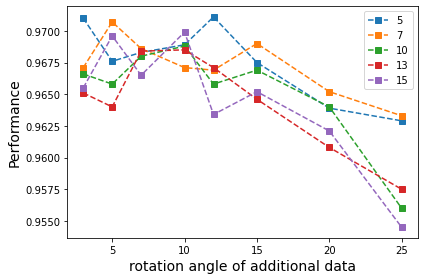

In [240]:
plt.figure()
for e in epochs:
    subdf = df_rot[df_rot['epochs']==e]
    subdf = subdf.sort_values(by='angle')
    performance = subdf['performance'].to_numpy()
    plt.plot(angle, performance, label=f'{e}', marker='s', ls='--')
plt.xlabel('rotation angle of additional data', fontsize=14)
plt.ylabel('Performance', fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()

### remove bad performance classifiers

In [267]:
clf_list = list(clf_dir.glob('*.pkl'))

for clfname in clf_list:
    with open(clfname, 'rb') as f:
        clf = pickle.load(f)
    if clf.performance < 0.97:
        print(f"Removing {clfname}")
        clfname.unlink()

In [271]:
clf_list = list(clf_dir.glob('*.pkl'))

for clfname in clf_list:
    with open(clfname, 'rb') as f:
        clf = pickle.load(f)
    print(f"{clf.performance = :.4f}, {clf.hnodes = }, {clf.lr = :.2f}, {clf.epochs = }")

clf.performance = 0.9750, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 9

clf.performance = 0.9745, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 4

clf.performance = 0.9743, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 4

clf.performance = 0.9720, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 15

clf.performance = 0.9736, clf.hnodes = 500, clf.lr = 0.01, clf.epochs = 9

clf.performance = 0.9724, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 20

clf.performance = 0.9709, clf.hnodes = 500, clf.lr = 0.01, clf.epochs = 7

clf.performance = 0.9750, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 10

clf.performance = 0.9701, clf.hnodes = 500, clf.lr = 0.20, clf.epochs = 6

clf.performance = 0.9755, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 4

clf.performance = 0.9708, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 20

clf.performance = 0.9715, clf.hnodes = 300, clf.lr = 0.01, clf.epochs = 9

clf.performance = 0.9765, clf.hnodes = 300, clf.lr = 0.01, clf.epochs = 15

clf.performance = 0.9700, clf.hnodes = 100, clf.lr = 0.10, clf.epochs = 6

clf.performance = 0.9709, clf.hnodes = 500, clf.lr = 0.20, clf.epochs = 10

clf.performance = 0.9735, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 6

clf.performance = 0.9729, clf.hnodes = 300, clf.lr = 0.01, clf.epochs = 10

clf.performance = 0.9753, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 10

clf.performance = 0.9716, clf.hnodes = 400, clf.lr = 0.01, clf.epochs = 9

clf.performance = 0.9700, clf.hnodes = 300, clf.lr = 0.20, clf.epochs = 7

clf.performance = 0.9723, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 3

clf.performance = 0.9738, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 7

clf.performance = 0.9735, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 3

clf.performance = 0.9732, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 15

clf.performance = 0.9708, clf.hnodes = 500, clf.lr = 0.20, clf.epochs = 9

clf.performance = 0.9766, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 7

clf.performance = 0.9764, clf.hnodes = 400, clf.lr = 0.01, clf.epochs = 15

clf.performance = 0.9702, clf.hnodes = 400, clf.lr = 0.20, clf.epochs = 4

clf.performance = 0.9750, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 9

clf.performance = 0.9714, clf.hnodes = 500, clf.lr = 0.20, clf.epochs = 5

clf.performance = 0.9737, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 20

clf.performance = 0.9745, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 5

clf.performance = 0.9759, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 7

clf.performance = 0.9774, clf.hnodes = 400, clf.lr = 0.01, clf.epochs = 20

clf.performance = 0.9752, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 15

clf.performance = 0.9710, clf.hnodes = 200, clf.lr = 0.01, clf.epochs = 10

clf.performance = 0.9729, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 6

clf.performance = 0.9758, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 5

clf.performance = 0.9737, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 5

clf.performance = 0.9741, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 6

clf.performance = 0.9754, clf.hnodes = 200, clf.lr = 0.01, clf.epochs = 20

clf.performance = 0.9750, clf.hnodes = 500, clf.lr = 0.01, clf.epochs = 10

clf.performance = 0.9702, clf.hnodes = 400, clf.lr = 0.20, clf.epochs = 5

clf.performance = 0.9727, clf.hnodes = 400, clf.lr = 0.01, clf.epochs = 8

clf.performance = 0.9768, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 10

clf.performance = 0.9771, clf.hnodes = 200, clf.lr = 0.01, clf.epochs = 15

clf.performance = 0.9717, clf.hnodes = 100, clf.lr = 0.01, clf.epochs = 20

clf.performance = 0.9757, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 8

clf.performance = 0.9751, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 20

clf.performance = 0.9743, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 8

clf.performance = 0.9788, clf.hnodes = 300, clf.lr = 0.01, clf.epochs = 20

clf.performance = 0.9704, clf.hnodes = 300, clf.lr = 0.01, clf.epochs = 8

clf.performance = 0.9733, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 15

clf.performance = 0.9750, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 7

clf.performance = 0.9744, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 5

clf.performance = 0.9719, clf.hnodes = 500, clf.lr = 0.01, clf.epochs = 8

clf.performance = 0.9726, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 3

clf.performance = 0.9722, clf.hnodes = 500, clf.lr = 0.20, clf.epochs = 7

clf.performance = 0.9718, clf.hnodes = 200, clf.lr = 0.01, clf.epochs = 9

clf.performance = 0.9728, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 6

clf.performance = 0.9738, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 8

clf.performance = 0.9767, clf.hnodes = 500, clf.lr = 0.01, clf.epochs = 15

clf.performance = 0.9705, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 3

clf.performance = 0.9733, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 8

clf.performance = 0.9776, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 10

clf.performance = 0.9788, clf.hnodes = 500, clf.lr = 0.01, clf.epochs = 20

clf.performance = 0.9760, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 9

clf.performance = 0.9754, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 9

clf.performance = 0.9749, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 4

clf.performance = 0.9729, clf.hnodes = 400, clf.lr = 0.01, clf.epochs = 10